<a href="https://colab.research.google.com/github/Wincenttjoi/employee-data-visualization/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [31]:
url = 'https://raw.githubusercontent.com/Wincenttjoi/employee-data-visualization/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Introduction**

We are Piethon HR Consulting Firm. Our aim is to provide consulting services to MNCs all over the globe. We have been in the industry for over 10 years and have helped over 200 businesses with their human resource matters. Deck Pte. Ltd (Deck) has approached Piethon HR Consulting Firm to resolve their high attrition rate amongst their employees in 2021. Organisations are supposed to aim for 10% or lower for attrition rate (Insight Global, 2021), however Deck has a relatively higher 16.12% attrition rate. 

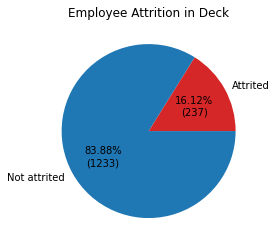

In [32]:
### Pie chart of attrition rate
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, x*total/100)

total = df.shape[0]
count_attrition = df[df['Attrition'] == 'Yes'].shape[0]
count_attrition_no = total - count_attrition
counts = [count_attrition, count_attrition_no]
labels = ['Attrited', 'Not attrited']
plt.pie(counts, labels = labels, autopct=my_fmt, colors=["C3", "C0"])
plt.title('Employee Attrition in Deck')
plt.show()

To analyse the correlation between the variables to the attrition rate in Deck, we have constructed a correlation heatmap.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


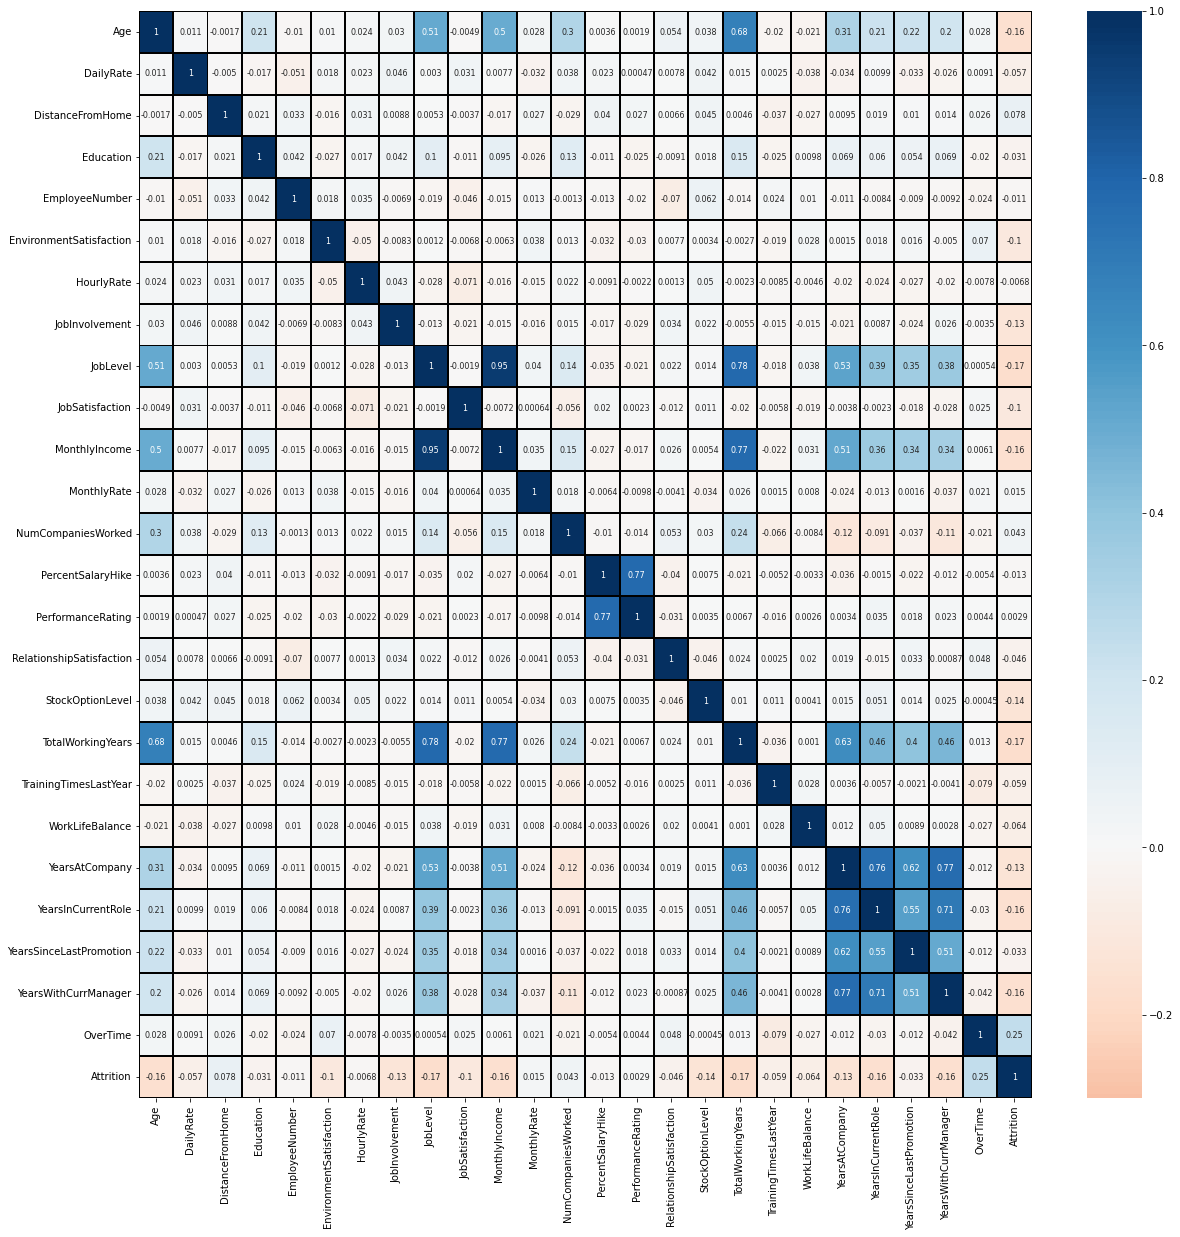

In [33]:
df_numerical = df.select_dtypes("int")
df_numerical['OverTime'] = df['OverTime'].replace(['Yes', 'No'], [1,0])
df_numerical = df_numerical.join(df['Attrition'])
df_numerical['Attrition'] = df_numerical['Attrition'].replace(['Yes', 'No'], [1,0])
df_numerical['Attrition'] = df_numerical['Attrition'].astype(float)
corr_table = df_numerical.corr()
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], inplace=True)
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_table, 
            annot=True, 
            cmap="RdBu", 
            center=0, 
            annot_kws={"size":8}, 
            vmin=-0.3, 
            vmax=1, 
            linewidth=1, 
            linecolor='black')
plt.show()

This bar chart is the concise version of the heatmap to allow better comprehension of Deck’s data as it focuses on the correlation between the different numerical factors and attrition. 

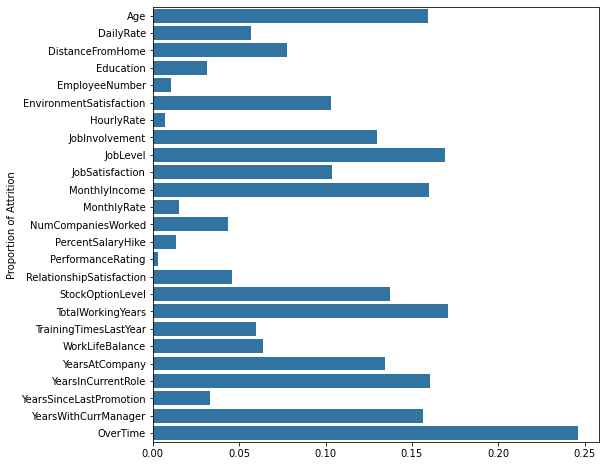

In [34]:
plt.figure(figsize=(8,8))
df2 = df_numerical.drop(['Attrition', 'EmployeeCount', 'StandardHours'], axis = 1)
mod_value = abs(df2.corrwith(df_numerical['Attrition']))
ax = sns.barplot(x=mod_value, y=df2.corrwith(df_numerical['Attrition']).index, color="C0")
ax.set_ylabel("Proportion of Attrition")
plt.show()

Although there are multiple variables in the dataset, we have decided to analyse 4 variables with the highest correlation coefficient with attrition rate as rectifying these chosen variables are most likely to allow a decrease in attrition rate which is the aim of our project. In this report, we will explore these top 4 variables: ‘Overtime’, ‘TotalWorkingYears’, ‘Monthly Income’ and ‘JobLevel’.

After analysing Deck’s data, we noticed that overtime is the key factor correlated with attrition.

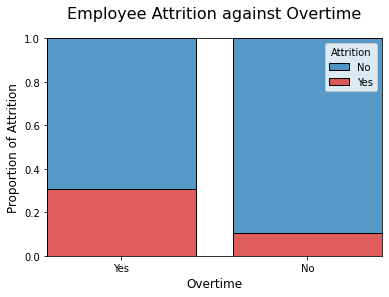

In [35]:
### 100% stacked histogram of x=Overtime and y=attrition
p = sns.histplot(
    data=df,
    x="OverTime", hue="Attrition",
    hue_order=['No', 'Yes'], palette=["C0", "C3"],
    multiple="fill", stat="proportion",
    shrink=.8
)
p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Overtime", fontsize=12)
p.set_title("Employee Attrition against Overtime", fontsize=16, pad=20)
plt.show()

As reflected from the bar chart, about 30% of Deck employees who worked overtime left the company, whereas only about 10% of those who did not overtime  left. Hence, employees who worked overtime in 2021 have a higher tendency to leave the company.


In [36]:
linear_reg_ot = df_numerical[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]

out = smf.ols('Attrition ~ Age + DistanceFromHome + StockOptionLevel + NumCompaniesWorked + JobLevel + OverTime + MonthlyIncome + YearsAtCompany + WorkLifeBalance', linear_reg_ot).fit()
print(out.summary())

# factors = factors_attrition[['MonthlyIncome','WorkLifeBalance', 'JobLevel', 'OverTime']]
factors = df_numerical[['Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
attrition = df_numerical[['Attrition']]

employee = LinearRegression().fit(factors, attrition)

before_change = employee.predict(np.array([[30, 5, 1, 2, 1, 1, 5000, 1, 3]]))
after_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 5000, 1, 3]]))

print('The predicted attrition rate is', before_change)
print('The predicted attrition rate is', after_change)

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     25.47
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.10e-41
Time:                        18:02:53   Log-Likelihood:                -508.09
No. Observations:                1470   AIC:                             1036.
Df Residuals:                    1460   BIC:                             1089.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4315      0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Our model shows that when an employee changes from with to without overtime, the probability of Deck’s employee leaving the company decreases from 0.366 to 0.116.

**Assumptions**

Assumption 1: Model can be written as y = βage + βdistance_from_home + βstock_option_level + βnum_companies_worked + βjob_level + βovertime + βmonthlyincome + βyears_at_company + βwork_life_balance + u where u is an unobserved random error or disturbance term.

Assumption 2: Population data is assumed to be used by the company since 1470 data inputs are comprehensible. Should the data be a sample data, it is assumed to be randomly generated following the population model in assumption 1.

Assumption 3: There is no perfect collinearity since all the independent variables used have multiple values.

Assumption 4: The error term u has expected value of zero given any values of independent variables. 

Assumption 5: Sampling distributions of the estimator are centered about true population parameter values of βage, βdistance_from_home, βstock_option_level , βnum_companies_worked, βjob_level, βovertime, βmonthlyincome, βyears_at_company, βwork_life_balance. Error term u has the same variance given any values of independent variables.

Assumption 6: u ∼ N(0, σ2) is satisfied.

We decided to explore the relationship between the ‘MonthlyIncome’ variable and the proportion of the ‘Attrition Rate’ as compensation plays a fundamental role in retaining employees whereby 56% of employers experienced a decrease in attrition rate after improving the equity of their compensation system (Mednefits, 2021). Furthermore, based on the aforementioned heatmap, there was some correlation between ‘MonthlyIncome’ and ‘Attrition Rate’.


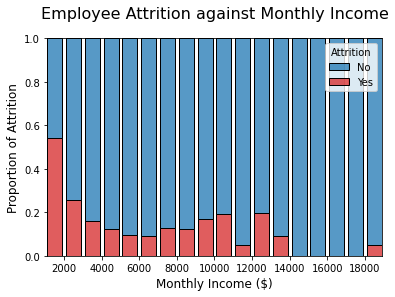

In [37]:
### 100% stacked histogram of x=income and y=attrition
bins_hist = range(1000, 20000, 1000)

p = sns.histplot(
    data=df,
    bins = bins_hist,
    x="MonthlyIncome", hue="Attrition",
    multiple="fill", stat="proportion",
    shrink=.8, hue_order=['No', 'Yes'], palette=["C0", "C3"]
)

p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Monthly Income ($)", fontsize=12)
p.set_title("Employee Attrition against Monthly Income", fontsize=16, pad=20)
plt.show()

It can be observed that based on the histogram above, there is a strong negative correlation between attrition rate and monthly income between 1000 - 4000 dollars. For employees earning below 2000 dollars, the attrition rate is as high as 54.5%. Hence, we can conclude that salary is indeed a motivator to retain employees in Deck for the lower-income earners. Above 4000 dollars, the correlation appears flat and thus other factors should be considered for that income range.


In [38]:
income_threshold = 4000
linear_reg_mi = df_numerical[df_numerical['MonthlyIncome'] < income_threshold]
linear_reg_mi = linear_reg_mi[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]

out = smf.ols('Attrition ~ Age + DistanceFromHome + StockOptionLevel + NumCompaniesWorked + JobLevel + OverTime + MonthlyIncome + YearsAtCompany + WorkLifeBalance', linear_reg_mi).fit()
print(out.summary())

factors_attrition= df[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
factors_attrition['Attrition'] = factors_attrition['Attrition'].replace(['Yes', 'No'], [1,0])
factors_attrition['OverTime'] = factors_attrition['OverTime'].replace(['Yes', 'No'], [1,0])
factors = factors_attrition[['Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
factors = factors[factors['MonthlyIncome'] < income_threshold]
attrition = factors_attrition.loc[factors_attrition['MonthlyIncome'] < income_threshold, 'Attrition']

employee = LinearRegression().fit(factors, attrition)

before_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 2000, 1, 3]]))
after_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 3000, 1, 3]]))

print('The predicted attrition rate is',before_change)
print('The predicted attrition rate is',after_change)

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     20.71
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.07e-30
Time:                        18:02:54   Log-Likelihood:                -236.01
No. Observations:                 542   AIC:                             492.0
Df Residuals:                     532   BIC:                             535.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7517      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/l

We used the same model as above for employees with a monthly income < 4000 dollars and found that our model has adjusted R2 of 0.259 and βmonthly income was 9.2e-5. This model can be interpreted that for every $1000 increase in employee’s salary, the probability of Deck’s employee leaving the company decreases by 0.092.

Same assumptions as ML model earlier apply.

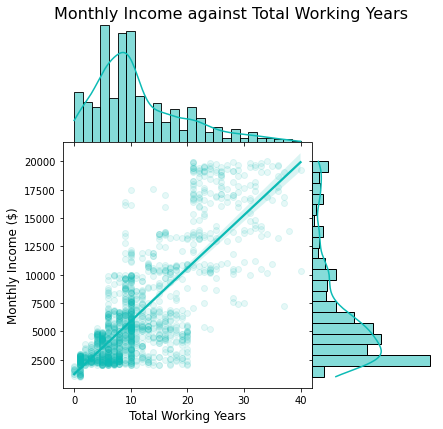

In [39]:
p = sns.jointplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'], kind='reg', 
             ratio = 2, space = 0, color = '#0CBBB5', joint_kws = {'scatter_kws':dict(alpha=0.1)})
# sns.regplot(data=df, x='points', y='assists').set(title='Points vs. Assists')
p.set_axis_labels('Total Working Years', 'Monthly Income ($)', fontsize=12)
p.fig.suptitle("Monthly Income against Total Working Years", fontsize=16)
p.fig.subplots_adjust(top=0.95)
plt.show()

According to CareerBuilder (2020), work experience was ranked first out of five other factors that determine the salary of employees. Therefore, looking at the graph above, it can be proven that less experienced employees have generally lower pay which indicates that they are more likely to leave the organisation as shown in the Monthly Income vs Attrition Rate graph above.

To further explore the problem of monthly income issues as discussed earlier, we decided to analyse the relationship between the ‘JobLevel’ and ‘MonthlyIncome’.

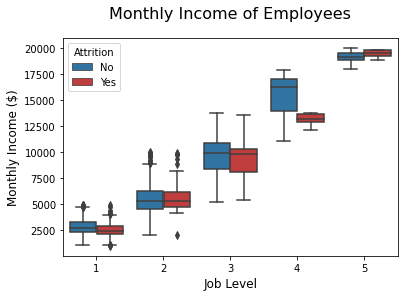

In [40]:
###### Monthly income and job level

### Monthly income vs job level -> Monthly income is correlated to job level

p = sns.boxplot(y='MonthlyIncome', x='JobLevel', hue='Attrition', data=df, hue_order=['No', 'Yes'], palette=["C0", "C3"])

p.set_ylabel("Monthly Income ($)", fontsize=12)
p.set_xlabel("Job Level", fontsize=12)
p.set_title("Monthly Income of Employees", fontsize=16, pad=20)
plt.show()

From the box and whisker plot above, it can be observed that most employees who left the organisation were earning similar mean salaries as those who left, with the exception of those in Job Level 4 where those who left earned a significantly lower mean salary compared to those who stayed in Deck. Suspecting income difference could be the vital reason for their attrition, we decided to further explore other factors to verify our hypothesis.


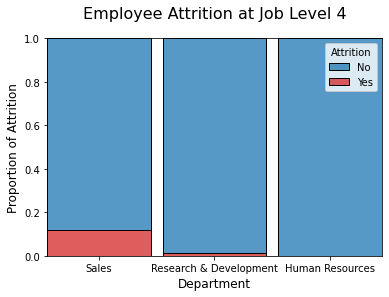

In [41]:
### Histogram for Department with attrition where JobLevel = 4
p = sns.histplot(
    data=df.where(df["JobLevel"] == 4),
    bins = bins_hist,
    x="Department", hue="Attrition", hue_order=['No', 'Yes'], palette=["C0", "C3"],
    multiple="fill", stat="proportion",
    shrink=.9
)
p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Department", fontsize=12)
p.set_title("Employee Attrition at Job Level 4", fontsize=16, pad=20)
plt.show()

Focusing on Job Level 4, we explored the different departments present in Deck to look for the distribution of the attrition rate within these departments. As evident from the graph above, the attrition rate is high among employees from the sales department. Hence, we further investigated if working conditions in the sales department have impacted employees' decision to leave the organisation.  

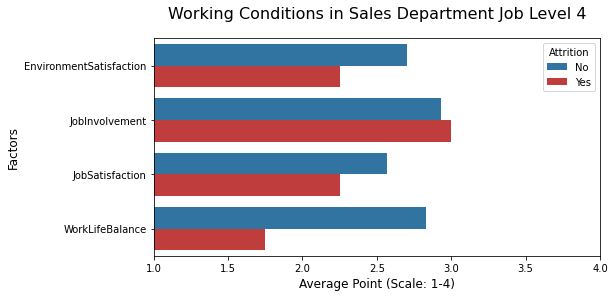

Since pvalue = 0.011348729743623472 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of EnvironmentSatisfaction of attrited employees is lesser than those employees who stay
Since pvalue = 0.30825311842017294 is greater than significance level of 0.05 , we do not reject null hypothesis and have insufficient evidence to conclude that mean of JobInvolvement of attrited employees is lesser than those employees who stay
Since pvalue = 0.013590064203149342 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of WorkLifeBalance of attrited employees is lesser than those employees who stay
Since pvalue = 1.2869621479684972e-08 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of JobSatisfaction of attrited employees is lesser than those employees who stay


In [43]:
f, ax = plt.subplots(figsize=(8,4))

sales = df.loc[(df['Department'] == 'Sales') & (df['JobLevel'] == 4), ['EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'JobSatisfaction']]
sales_df = sales.reset_index().melt('index', var_name='Factors', value_name='avg')
sales_df = sales_df.set_index('index').join(df['Attrition'])
sales_df = sales_df.groupby(['Attrition', 'Factors']).agg(avg = ("avg", 'mean'))
sales_df = sales_df.reset_index()

sns.barplot(x="avg", y="Factors", hue="Attrition", data=sales_df, palette=["C0", "C3"])
ax.set(xlim=(1,4))
ax.set_ylabel("Factors", fontsize=12)
ax.set_xlabel("Average Point (Scale: 1-4)", fontsize=12)
ax.set_title("Working Conditions in Sales Department Job Level 4", fontsize=16, pad=20)
plt.show()

def conduct_hypothesis_testing():
  sales_not_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'No', "avg"])
  sales_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'Yes', "avg"])
  n = np.array(sales.count())
  sd = np.array(sales.std())
  zvalue = (sales_attr_avg  - sales_not_attr_avg) / (sd / n**0.5)
  pvalue = scst.norm.sf(abs(zvalue))

  sig_level = 0.05
  for i in range(len(pvalue)):
      if pvalue[i] < sig_level:
          print("Since pvalue =", pvalue[i], "is smaller than significance level of", sig_level, ", we reject null hypothesis and have sufficient evidence conclude that mean of", sales.columns[i], 
                "of attrited employees is lesser than those employees who stay")
      else:
          print("Since pvalue =", pvalue[i], "is greater than significance level of", sig_level, ", we do not reject null hypothesis and have insufficient evidence to conclude that mean of", sales.columns[i], 
          "of attrited employees is lesser than those employees who stay")
  

conduct_hypothesis_testing()

From the bar graph, it is evident that employees who left the company have rated their environment satisfaction, job satisfaction and work life balance poorer than those who stay in the company.

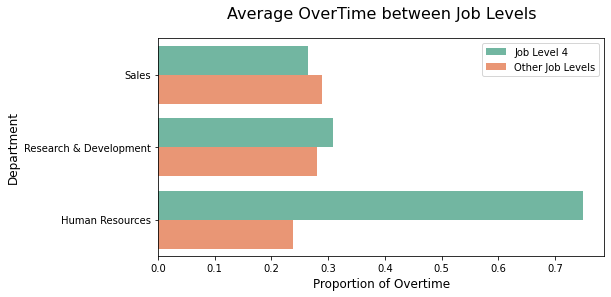

In [44]:
f, ax = plt.subplots(figsize=(8,4))
df['OverTime'] = df['OverTime'].replace(['Yes', 'No'], [1,0])
sales_lvl4 = df.loc[df['JobLevel'] == 4, ['OverTime', 'Department']]
sales_lvl4['JobLevel4'] = 'Yes'
sales_alllvl = df.loc[df['JobLevel'] != 4, ['OverTime', 'Department']]
sales_alllvl['JobLevel4'] = 'No'
sales_combine = sales_lvl4.append(sales_alllvl)
ax = sns.barplot(x='OverTime', y='Department', data=sales_combine, hue='JobLevel4', palette="Set2", ci=None)
ax.set_ylabel("Department", fontsize=12)
ax.set_xlabel("Proportion of Overtime", fontsize=12)
plt.legend(loc='upper right', labels=['Job Level 4', 'Other Job Levels'])
plt.title("Average OverTime between Job Levels", fontsize=16, pad=20)
plt.show()

It was initially inferred that overtime has the highest correlation with attrition rate compared to other factors. Therefore, based on the bar graph above, we studied the relationship between JobLevel 4 and other Job Levels to overtime for each department. Surprisingly, despite high job involvement and poor work-life balance in Job Level 4 Sales employees, a smaller percentage of these employees have worked overtime as compared to other Job Levels in the Sales department or to Job Level 4 in the Human Resource department. This contradicts with the initial inference that overtime in Sales Job Level 4 to be the main determinant for them to have poor work life balance and high job involvement . Stress level of employees is surmised to be the next best possible factor as the main reason for Job Level 4 Sales employees to leave Deck.
